### Association of Tennis Professional EDA
#### Reference: https://www.kaggle.com/datasets/sijovm/atpdata/data

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import warnings
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_palette("bright")
warnings.filterwarnings('ignore')

#Read in the data
matches = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_matches_till_2022.csv")
players = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_players_till_2022.csv")
ranking = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_rankings_till_2022.csv")

print(matches.shape)
print(players.shape)
print(ranking.shape)

(188161, 49)
(58687, 8)
(3113261, 4)


In [2]:
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [4]:
ranking.head()

,ranking_date,rank,player,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0


In [5]:
#Rearrange matches data to have wins and losses partition
win_matches = matches.iloc[:,np.r_[0:15,23:36,45:47]]
lose_matches = matches.iloc[:,np.r_[0:7,15:27,36:45,47:49]]

print(win_matches.shape)
print(lose_matches.shape)

(188161, 30)
(188161, 30)


In [6]:
win_matches = win_matches.rename(
    columns={
        'winner_id':'player_id',
        'winner_seed':'player_seed',
        'winner_entry':'player_entry',
        'winner_name':'player_name',
        'winner_hand':'player_hand',
        'winner_ht':'player_ht',
        'winner_ioc':'player_ioc',
        'winner_age':'player_age',
        'w_ace':'num_aces',
        'w_df':'num_dfs',
        'w_svpt':'num_svpts',
        'w_1stIn':'serve1_in_perc',
        'w_1stWon':'serve1_win_perc',
        'w_2ndWon':'serve2_win_perc',
        'w_SvGms':'num_games_served',
        'w_bpSaved':'num_brkpts_saved',
        'w_bpFaced':'num_brkpts_faced',
        'winner_rank':'rank',
        'winner_rank_points':'rank_points'
    }
)

win_matches['outcome'] = 1

In [7]:
lose_matches = lose_matches.rename(
    columns={
        'loser_id':'player_id',
        'loser_seed':'player_seed',
        'loser_entry':'player_entry',
        'loser_name':'player_name',
        'loser_hand':'player_hand',
        'loser_ht':'player_ht',
        'loser_ioc':'player_ioc',
        'loser_age':'player_age',
        'l_ace':'num_aces',
        'l_df':'num_dfs',
        'l_svpt':'num_svpts',
        'l_1stIn':'serve1_in_perc',
        'l_1stWon':'serve1_win_perc',
        'l_2ndWon':'serve2_win_perc',
        'l_SvGms':'num_games_served',
        'l_bpSaved':'num_brkpts_saved',
        'l_bpFaced':'num_brkpts_faced',
        'loser_rank':'rank',
        'loser_rank_points':'rank_points'
    }
)

lose_matches['outcome'] = 0

In [8]:
#Stack wins and losses data
matches = pd.concat([win_matches, lose_matches], ignore_index=True, axis=0)
matches.shape

(376322, 31)

In [9]:
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,num_svpts,serve1_in_perc,serve1_win_perc,serve2_win_perc,num_games_served,num_brkpts_saved,num_brkpts_faced,rank,rank_points,outcome
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


#### Which players had most weeks ranked as #1?

In [10]:
ranking['year'] = ranking['ranking_date'].astype(str).str[:4]
ranking['ranking_date'] = pd.to_datetime(ranking['ranking_date'].astype(str), format='%Y%m%d')
ranking = ranking.rename(columns={'player':'player_id'})
ranking1 = ranking[ranking['rank']==1]
ranking1.head()

,ranking_date,rank,player_id,points,year
0,2010-01-04,1,103819,10550.0,2010
1812,2010-01-11,1,103819,10550.0,2010
3626,2010-01-18,1,103819,10550.0,2010
5439,2010-01-25,1,103819,10550.0,2010
7252,2010-02-01,1,103819,11350.0,2010


In [11]:
weeks_at_1 = pd.DataFrame(ranking1.groupby('player_id')['rank'].sum()).reset_index()
weeks_at_1 = weeks_at_1.rename(columns={'rank': 'count'})
weeks_at_1 = weeks_at_1.sort_values(by = 'count', ascending=False)
weeks_at_1.head(5)

,player_id,count
25,104925,332
21,103819,307
12,101948,285
5,100656,228
23,104745,193


In [12]:
plyrs = players[['player_id','name_first','name_last','hand','ioc','dob','height']]

In [13]:
weeks_at_1_with_names = pd.merge(weeks_at_1, plyrs, on='player_id', how='inner')
weeks_at_1_with_names.head(10)

,player_id,count,name_first,name_last,hand,ioc,dob,height
0,104925,332,Novak,Djokovic,R,SRB,19870522.0,188.0
1,103819,307,Roger,Federer,R,SUI,19810808.0,185.0
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0
8,100437,94,Bjorn,Borg,R,SWE,19560606.0,180.0
9,103720,80,Lleyton,Hewitt,R,AUS,19810224.0,180.0


#### Longest tenures ranked as #1 (Right vs. Left Handed)

In [14]:
right = weeks_at_1_with_names[weeks_at_1_with_names['hand']=="R"]
left = weeks_at_1_with_names[weeks_at_1_with_names['hand']=="L"]

In [15]:
right.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
0,104925,332,Novak,Djokovic,R,SRB,19870522.0,188.0
1,103819,307,Roger,Federer,R,SUI,19810808.0,185.0
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0


In [16]:
left.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
23,102701,6,Marcelo,Rios,L,CHI,19751226.0,175.0
24,101404,6,Thomas,Muster,L,AUT,19671002.0,180.0


### Longest tenures ranked as #1 by country

In [17]:
usa = weeks_at_1_with_names[weeks_at_1_with_names['ioc']=="USA"]
spain = weeks_at_1_with_names[weeks_at_1_with_names['ioc']=="ESP"]

usa.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0


In [18]:
spain.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
15,207989,16,Carlos,Alcaraz,R,ESP,20030505.0,185.0
21,103507,8,Juan Carlos,Ferrero,R,ESP,19800212.0,183.0
25,102845,2,Carlos,Moya,R,ESP,19760827.0,190.0


### Which country had the most players ranked at #1?

In [19]:
country_counts = weeks_at_1_with_names[['ioc','player_id']]
country_counts = pd.DataFrame(weeks_at_1_with_names.groupby('ioc')['player_id'].count()).reset_index()

country_counts = country_counts.rename(columns={
    'ioc': 'country',
    'player_id':'count'
})
country_counts = country_counts.sort_values(by = 'count', ascending=False)
country_counts.head()

,country,count
12,USA,7
4,ESP,4
0,AUS,3
8,RUS,3
11,SWE,3


### What is the average age of players ranked 1-5?

In [20]:
age_df = pd.merge(ranking, plyrs, on='player_id', how='inner')
age_df['dob'] = pd.to_datetime(age_df['dob'].astype(str), format='%Y%m%d')
age_df['age_days'] = (age_df['ranking_date'] - age_df['dob'])
age_df['age_yrs'] = age_df["age_days"] / timedelta(days=365)
age_df.head()

,ranking_date,rank,player_id,points,year,name_first,name_last,hand,ioc,dob,height,age_days,age_yrs
0,2010-01-04,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10376 days,28.427397
1,2010-01-11,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10383 days,28.446575
2,2010-01-18,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10390 days,28.465753
3,2010-01-25,1,103819,10550.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10397 days,28.484932
4,2010-02-01,1,103819,11350.0,2010,Roger,Federer,R,SUI,1981-08-08,185.0,10404 days,28.504110


In [21]:
age_df = age_df[age_df['rank']<=5]
age_df['rank_cat'] = age_df['rank'].astype('str')
age_df['year'] = age_df['year'].astype(int)
age_df.shape

(10937, 14)

In [22]:
age_counts = pd.DataFrame(age_df.groupby('rank')['age_yrs'].mean()).reset_index()
age_counts.head()

,rank,age_yrs
0,1,26.200848
1,2,25.826423
2,3,26.140989
3,4,25.673485
4,5,25.696923


In [23]:
year_age_counts = pd.DataFrame(age_df.groupby(['year','rank'])['age_yrs'].mean()).reset_index()
year_age_counts['rank_cat'] = year_age_counts['rank'].astype('str')
year_age_counts.head()

,year,rank,age_yrs,rank_cat
0,1973,1,27.273973,1
1,1973,2,28.756947,2
2,1973,3,23.493933,3
3,1973,4,27.037182,4
4,1973,5,27.758513,5


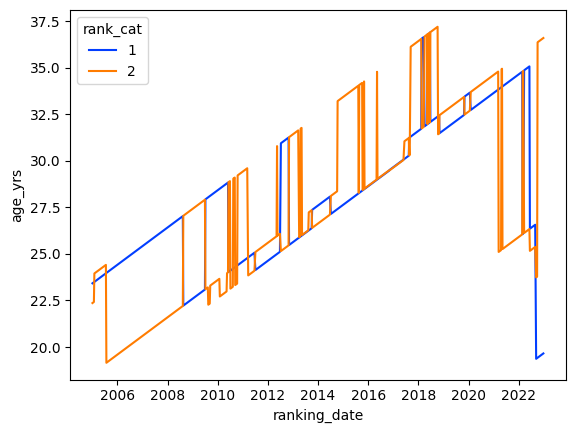

In [24]:
#Plot 1: 2005 to 2022, Age of Players ranked 1 and 2
fig = sns.lineplot(data=age_df[(age_df['year']>=2005) & (age_df['rank']<=2)], 
                   x='ranking_date', 
                   y='age_yrs', 
                   hue='rank_cat')

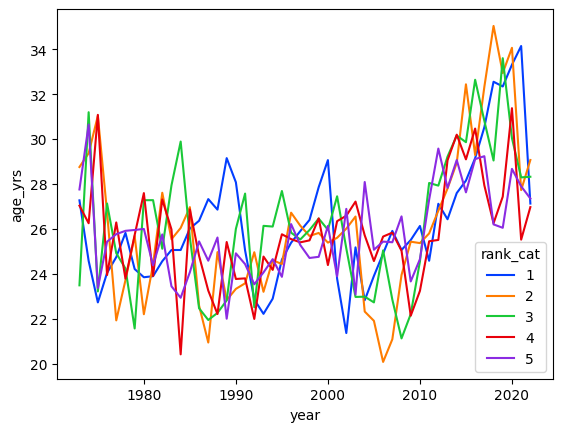

In [25]:
#Plot 2: average age of players ranked 1-5 from 1968 to 2022
fig = sns.lineplot(data=year_age_counts,
                   x='year', 
                   y='age_yrs', 
                   hue='rank_cat')

### What is the average height of players ranked 1-5?

In [26]:
ht_df = age_df 
ht_df['height_ft'] = ht_df['height']/30.48

year_ht_counts = pd.DataFrame(ht_df.groupby(['year','rank'])['height_ft'].mean()).reset_index()
year_ht_counts['rank_cat'] = year_ht_counts['rank'].astype('str')
year_ht_counts.head()

,year,rank,height_ft,rank_cat
0,1973,1,6.003937,1
1,1973,2,5.980502,2
2,1973,3,5.910199,3
3,1973,4,6.013311,4
4,1973,5,6.013311,5


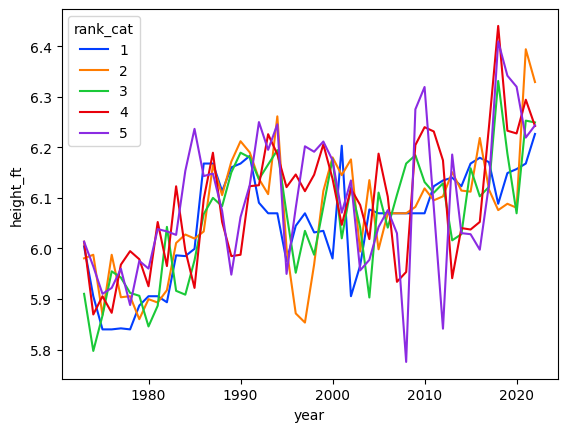

In [27]:
#Plot 3: Average height of players ranked 1-5 from 1968 to 2022
fig = sns.lineplot(data=year_ht_counts,
                   x='year', 
                   y='height_ft', 
                   hue='rank_cat')

### Explore the matches dataset

In [28]:
#1.) How to join on player data
#2.) Pick out one player
#3.) Look at their stats
#4.) Head to head frequency


In [29]:
#Convert walkover results to NAs
values_to_replace = ['W/O','Walkover','W/O']
matches['score'] = matches['score'].replace(values_to_replace, 0)

In [30]:
matches["sets"]= matches["score"].str.split(" ", n = 5, expand = False)
matches['set1_score'] = matches['sets'].str[0]
matches['set2_score'] = matches['sets'].str[1]
matches['set3_score'] = matches['sets'].str[2]
matches['set4_score'] = matches['sets'].str[3]
matches['set5_score'] = matches['sets'].str[4]

matches['set1_games_won'] = matches['set1_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
matches['set2_games_won'] = matches['set2_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
matches['set3_games_won'] = matches['set3_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
matches['set4_games_won'] = matches['set4_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)
matches['set5_games_won'] = matches['set5_score'].str.split("-", n = 2, expand = False).str[0].fillna(0)

matches['set1_games_lost'] = matches['set1_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
matches['set2_games_lost'] = matches['set2_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
matches['set3_games_lost'] = matches['set3_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
matches['set4_games_lost'] = matches['set4_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)
matches['set5_games_lost'] = matches['set5_score'].str.split("-", n = 2, expand = False).str[1].fillna(0)

matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,set1_games_won,set2_games_won,set3_games_won,set4_games_won,set5_games_won,set1_games_lost,set2_games_lost,set3_games_lost,set4_games_lost,set5_games_lost
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,6,7,0,0,0,1,5,0,0,0
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,6,6,0,0,0,1,1,0,0,0
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,6,6,0,0,0,2,2,0,0,0
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,6,6,0,0,0,1,1,0,0,0
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,6,6,0,0,0,2,4,0,0,0


In [31]:
values_to_replace = ['RET','','W/O','UNK','DEF','Apr','Walkover','?','ABD','Played','and','Def','Def.','NA','unfinished',
                    'Default','abandoned']

matches['set1_games_won'] = matches['set1_games_won'].replace(values_to_replace,0)
matches['set2_games_won'] = matches['set2_games_won'].replace(values_to_replace,0)
matches['set3_games_won'] = matches['set3_games_won'].replace(values_to_replace,0)
matches['set4_games_won'] = matches['set4_games_won'].replace(values_to_replace,0)
matches['set5_games_won'] = matches['set5_games_won'].replace(values_to_replace,0)


matches['set3_games_won'] = matches['set3_games_won'].replace('[13',13)
matches['set3_games_won'] = matches['set3_games_won'].replace('[12',12)
matches['set3_games_won'] = matches['set3_games_won'].replace('[11',11)
matches['set3_games_won'] = matches['set3_games_won'].replace('[10',10)
matches['set3_games_won'] = matches['set3_games_won'].replace('[7',7)
matches['set3_games_won'] = matches['set3_games_won'].replace('[6',6)
matches['set3_games_won'] = matches['set3_games_won'].replace('[4',4)
matches['set3_games_won'] = matches['set3_games_won'].replace('[3',3)
matches['set3_games_won'] = matches['set3_games_won'].replace('[1',1)
matches['set3_games_won'] = matches['set3_games_won'].replace('[0',0)



matches['set1_games_won'] = matches['set1_games_won'].astype(int)
matches['set2_games_won'] = matches['set2_games_won'].astype(int)
matches['set3_games_won'] = matches['set3_games_won'].astype(int)
matches['set4_games_won'] = matches['set4_games_won'].astype(int)
matches['set5_games_won'] = matches['set5_games_won'].astype(int)
matches['total_games_won'] = (matches['set1_games_won'] +
                                matches['set2_games_won'] +
                                matches['set3_games_won'] + 
                                matches['set4_games_won'] +
                                matches['set5_games_won'])

In [32]:
matches['set1_games_lost'] = matches['set1_games_lost'].str.replace(r"\(.*\)","")
matches['set2_games_lost'] = matches['set2_games_lost'].str.replace(r"\(.*\)","")
matches['set3_games_lost'] = matches['set3_games_lost'].str.replace(r"\(.*\)","")
matches['set4_games_lost'] = matches['set4_games_lost'].str.replace(r"\(.*\)","")
matches['set5_games_lost'] = matches['set5_games_lost'].str.replace(r"\(.*\)","")

In [33]:
set3_values_to_replace = ['08','?', '7]' ,'00', '8]','10]','6]','9]','1]','5]','4]','1?','6?', '3?','4?','0]','14]','13]','5?','11]','2]']
set4_values_to_replace = ['5?']

matches['set3_games_lost'] = matches['set3_games_lost'].replace(set3_values_to_replace,np.NaN)#.astype(int)
matches['set4_games_lost'] = matches['set4_games_lost'].replace(set4_values_to_replace,np.NaN)#.astype(int)


matches['set1_games_lost'] = matches['set1_games_lost'].replace(np.NaN,0)
matches['set2_games_lost'] = matches['set2_games_lost'].replace(np.NaN,0)
matches['set3_games_lost'] = matches['set3_games_lost'].replace(np.NaN,0)
matches['set4_games_lost'] = matches['set4_games_lost'].replace(np.NaN,0)
matches['set5_games_lost'] = matches['set5_games_lost'].replace(np.NaN,0)

In [34]:
matches['set1_games_lost'] = pd.to_numeric(matches['set1_games_lost'], errors='coerce')
matches['set2_games_lost'] = pd.to_numeric(matches['set2_games_lost'], errors='coerce')
matches['set3_games_lost'] = pd.to_numeric(matches['set3_games_lost'], errors='coerce')
matches['set4_games_lost'] = pd.to_numeric(matches['set4_games_lost'], errors='coerce')
matches['set5_games_lost'] = pd.to_numeric(matches['set5_games_lost'], errors='coerce')

In [35]:
matches['total_games_lost'] = (matches['set1_games_lost'] +
                                matches['set2_games_lost'] +
                                matches['set3_games_lost'] + 
                                matches['set4_games_lost'] +
                                matches['set5_games_lost'])

matches['total_games_played'] = matches['total_games_won'] + matches['total_games_lost']

matches['set1_win_perc'] = matches['set1_games_won'] / (matches['set1_games_won'] + matches['set1_games_lost'])
matches['set2_win_perc'] = matches['set2_games_won'] / (matches['set2_games_won'] + matches['set2_games_lost'])
matches['set3_win_perc'] = matches['set3_games_won'] / (matches['set3_games_won'] + matches['set3_games_lost'])
matches['set4_win_perc'] = matches['set4_games_won'] / (matches['set4_games_won'] + matches['set4_games_lost'])
matches['set5_win_perc'] = matches['set5_games_won'] / (matches['set5_games_won'] + matches['set5_games_lost'])

matches['game_win_perc'] = matches['total_games_won'] / (matches['total_games_won'] + matches['total_games_lost'])

## Impute missing values

In [36]:
print('Missing Games Played: ',matches['total_games_played'].isnull().sum())
print('Missing Minutes: ',matches['minutes'].isnull().sum())

Missing Games Played:  12
Missing Minutes:  197300


In [37]:
test = matches[matches['minutes'] <30]
print('Matches less than 30 minutes: ',test.shape[0])

Matches less than 30 minutes:  958


#### Impute minutes by median # games played

In [38]:
#Step 1: Delete rows with missing total games played
matches.dropna(subset=['total_games_played'], inplace=True)

#Step 2: Make values < 30 missing - not super reliable
matches.loc[matches['minutes'] < 30] = np.NaN

#Step 3: Impute based on median minutes per games played
matches['minutes'] = matches['minutes'].fillna(matches.groupby('total_games_played')['minutes'].transform('median'))

#Step 4: Check if any missing values left
print('Initial Missing Minutes: ', matches['minutes'].isnull().sum())

#Step 5: After inspecting the remaining values here, let's just drop
matches.dropna(subset=['minutes'], inplace=True)

#Step 6: Final check
print('Final Missing Minutes: ', matches['minutes'].isnull().sum())

Initial Missing Minutes:  1310
Final Missing Minutes:  0


<AxesSubplot: >

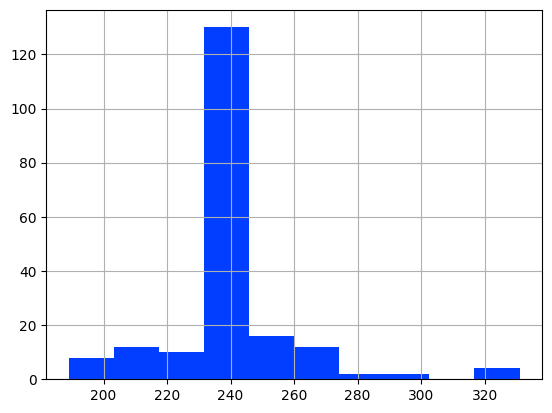

In [39]:
test = matches[matches['total_games_played']== 60]
test['minutes'].hist()

In [40]:
print('Missing games won: ',matches['total_games_won'].isnull().sum())
print('Missing games lost: ', matches['total_games_lost'].isnull().sum())

Missing games won:  0
Missing games lost:  0


#### Impute # of aces by median # games won

In [41]:
#Impute num_aces by # games won

#Step 1: Impute based on median games won
matches['num_aces'] = matches['num_aces'].fillna(matches.groupby('total_games_won')['num_aces'].transform('median'))

#Step 2: Check if any missing values left
print('Initial Missing Aces: ', matches['num_aces'].isnull().sum())

#Step 3: After inspecting the remaining values here, let's just drop
matches.dropna(subset=['num_aces'], inplace=True)

#Step 4: Final check
print('Final Missing Aces: ', matches['num_aces'].isnull().sum())


Initial Missing Aces:  6
Final Missing Aces:  0


#### Impute # double faults by median # games lost

In [42]:
#Step 1: Impute based on median games won
matches['num_dfs'] = matches['num_dfs'].fillna(matches.groupby('total_games_lost')['num_dfs'].transform('median'))

#Step 2: Check if any missing values left
print('Initial Missing Double Faults: ', matches['num_dfs'].isnull().sum())

#Step 3: After inspecting the remaining values here, let's just drop
matches.dropna(subset=['num_dfs'], inplace=True)

#Step 4: Final check
print('Final Missing Double Faults: ', matches['num_dfs'].isnull().sum())

Initial Missing Double Faults:  4
Final Missing Double Faults:  0


#### Impute 1st serve in %age by median # of games won

In [43]:
#Step 1: Impute based on median games won
matches['serve1_in_perc'] = matches['serve1_in_perc'].fillna(matches.groupby('total_games_won')['serve1_in_perc'].transform('median'))

#Step 2: Check if any missing values left
print('Initial Missing 1st serve in %: ', matches['serve1_in_perc'].isnull().sum())

Initial Missing 1st serve in %:  0


### Missing for Age, Surface, and Height

In [44]:
num1 = matches['player_age'].isnull().sum()
num2 = matches.shape[0]
print('Percentage of missing age values:',round(100*(num1/num2),2),"%")

num3 = matches['surface'].isnull().sum()
print('Percentage of missing surface values:',round(100*(num3/num2),2),"%")

num4 = matches['player_ht'].isnull().sum()
print('Percentage of missing height values:',round(100*(num4/num2),2),"%")

Percentage of missing age values: 1.64 %
Percentage of missing surface values: 1.23 %
Percentage of missing height values: 11.97 %


## Predict winner

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Filter data however you see fit
test = matches#[matches['tourney_date']>=20000101]
test = test[(test['player_age'].notnull()) & (test['surface'].notnull())]

#Choose features and response
y = test['outcome']
X = test[['num_dfs','minutes','num_aces','serve1_in_perc','player_age','surface']] 

#One Hot Encode surface
one_hot = pd.get_dummies(X['surface'])
X = X.drop('surface',axis=1)
X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(255182, 9)
(255182,)
(109364, 9)
(109364,)


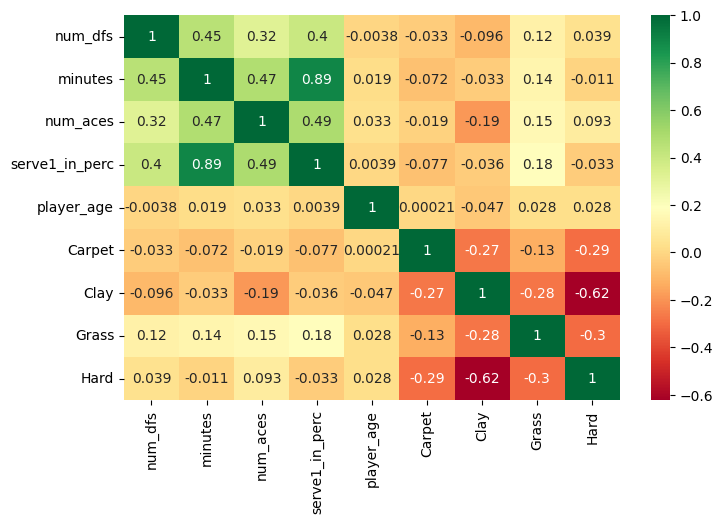

In [46]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Model 1: Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [48]:
#Check for overfitting
from sklearn.metrics import accuracy_score

#values are close so no issue with overfitting
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.5622
Test set score: 0.5604


<AxesSubplot: >

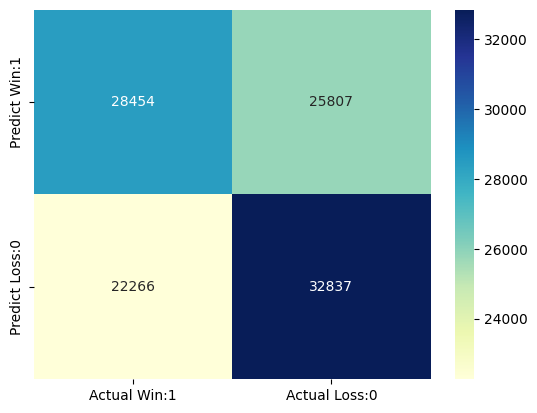

In [49]:
from sklearn.metrics import confusion_matrix

y_pred_test = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Win:1', 'Actual Loss:0'], 
                                 index=['Predict Win:1', 'Predict Loss:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot: ylabel='Feature'>

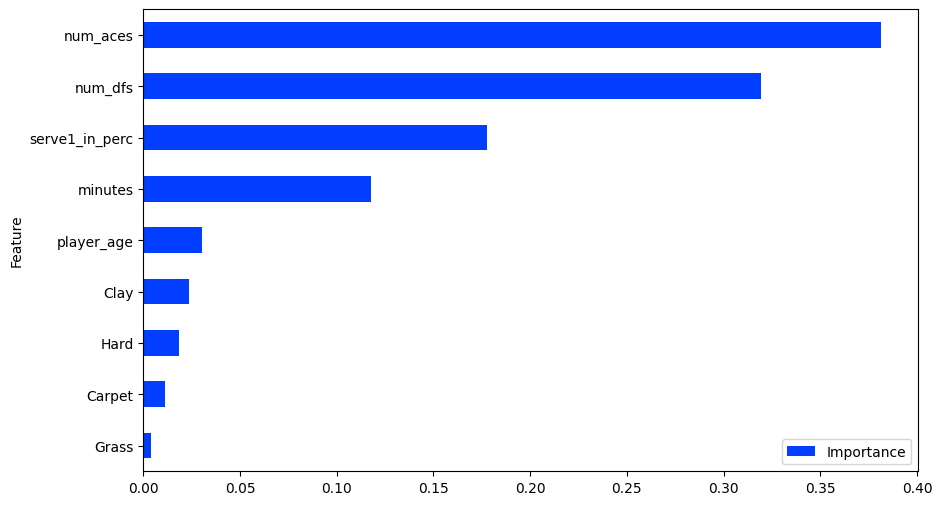

In [50]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.56      0.52      0.54     54261
         1.0       0.56      0.60      0.58     55103

    accuracy                           0.56    109364
   macro avg       0.56      0.56      0.56    109364
weighted avg       0.56      0.56      0.56    109364



In [52]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.56349315 0.55808531 0.56172114 0.56268124 0.56201505]


In [53]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5616


## Model 2: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# #Retroactively add this chunk back in to fix model overfitting

#Filter data however you see fit
test = matches[matches['tourney_date']>=20100101]
test = test[(test['player_age'].notnull()) & (test['surface'].notnull())]

#Choose features and response
y = test['outcome']
X = test[['minutes','serve1_in_perc','player_age']]#,'num_aces','num_dfs','surface']] 

# #One Hot Encode surface
# one_hot = pd.get_dummies(X['surface'])
# X = X.drop('surface',axis=1)
# X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
#Check for overfitting
from sklearn.metrics import accuracy_score

#values are not close so overfitting is for sure happening
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.9732
Test set score: 0.5044


<AxesSubplot: >

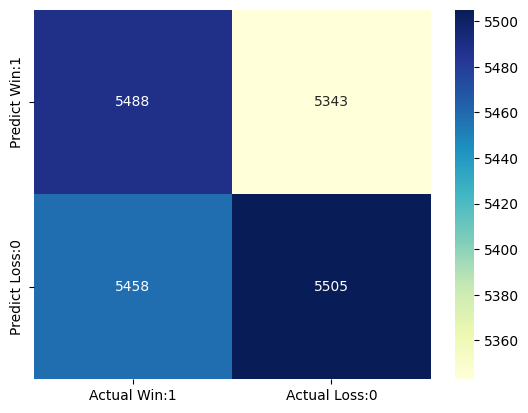

In [56]:
y_pred_test = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Win:1', 'Actual Loss:0'], 
                                 index=['Predict Win:1', 'Predict Loss:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [57]:
import time

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.032 seconds


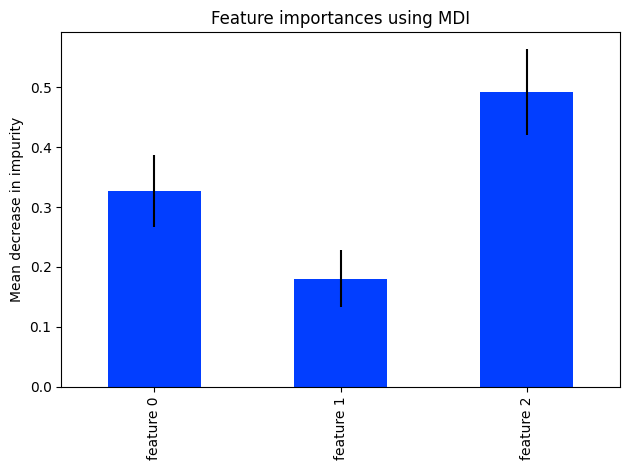

In [58]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [59]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.50      0.51      0.50     10831
         1.0       0.51      0.50      0.50     10963

    accuracy                           0.50     21794
   macro avg       0.50      0.50      0.50     21794
weighted avg       0.50      0.50      0.50     21794



In [60]:
# Applying 5-Fold Cross Validation

scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.49852507 0.50108161 0.50019666 0.49803343 0.49252704]


In [61]:
#Compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.4981


## Model 3: XGBoost (please work, not feeling great about this one)

In [62]:
from xgboost import XGBClassifier

#Filter data however you see fit
test = matches[matches['tourney_date']>=20100101]
test = test[(test['player_age'].notnull()) & (test['surface'].notnull())]

#Choose features and response
y = test['outcome']
X = test[['minutes','serve1_in_perc','player_age','num_aces','num_dfs','surface']] 


#One Hot Encode surface
one_hot = pd.get_dummies(X['surface'])
X = X.drop('surface',axis=1)
X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)


xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train, verbose = False, early_stopping_rounds=15,eval_set=[(X_test,y_test)])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [63]:
predictions = xgb_class.predict(X_test)

print('Training set score: {:.4f}'.format(xgb_class.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(xgb_class.score(X_test, y_test)))

Training set score: 0.6323
Test set score: 0.6145


## Models are all terrible, let's try surface-specific models

#### Grass Model

In [64]:
#Filter data however you see fit
test = matches[matches['tourney_date']>=20100101]
test = test[(test['player_age'].notnull()) & (test['surface']=="Grass")]

#Choose features and response
y = test['outcome']
X = test[['num_dfs','minutes','num_aces','serve1_in_perc','player_age']] 

scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5373, 5)
(5373,)
(2303, 5)
(2303,)


In [65]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6510
Test set score: 0.6452


<AxesSubplot: ylabel='Feature'>

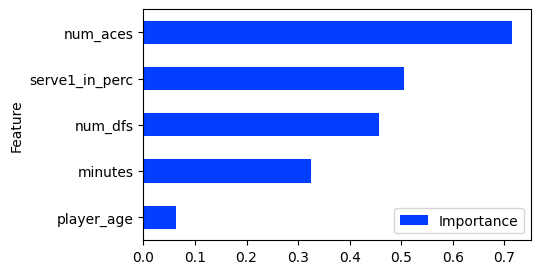

In [66]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))

### Clay Model

In [67]:
#Filter data however you see fit
test = matches[matches['tourney_date']>=20100101]
test = test[(test['player_age'].notnull()) & (test['surface']=="Clay")]

#Choose features and response
y = test['outcome']
X = test[['num_dfs','minutes','num_aces','serve1_in_perc','player_age']] 

scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15685, 5)
(15685,)
(6723, 5)
(6723,)


In [68]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6057
Test set score: 0.5979


<AxesSubplot: ylabel='Feature'>

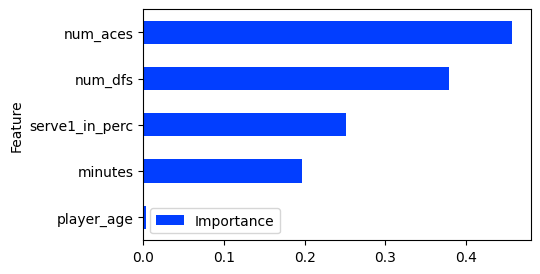

In [69]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))

### Hard Court Model

In [70]:
#Filter data however you see fit
test = matches[matches['tourney_date']>=20100101]
test = test[(test['player_age'].notnull()) & (test['surface']=="Hard")]

#Choose features and response
y = test['outcome']
X = test[['num_dfs','minutes','num_aces','serve1_in_perc','player_age']] 

scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29699, 5)
(29699,)
(12729, 5)
(12729,)


In [71]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6158
Test set score: 0.6211


<AxesSubplot: ylabel='Feature'>

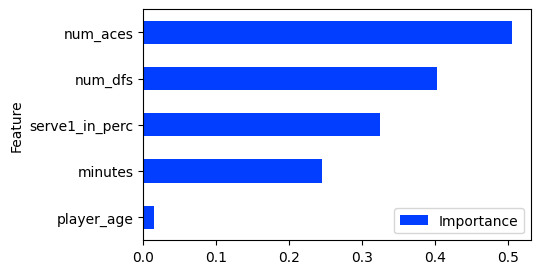

In [72]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))